In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
df = pd.read_csv('/content/Outlierclean.csv')

In [242]:
df.shape

(3588, 23)

In [243]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

In [244]:
df['area_room_ratio'] = (df['area']/df['bedRoom'])

In [245]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2643,flat,bestech park view sanskruti,sector 92,1.55,9687.0,1600.0,Super Built up area 1995(185.34 sq.m.)Carpet a...,3,3,3,17.0,NaN,Relatively New,1995.0,NaN,1600.0,0,1,0,0,0,1,60,533.333333
278,flat,m3m heights,sector 65,2.00,13957.0,1433.0,Built Up area: 1433 (133.13 sq.m.)Carpet area:...,2,2,2,32.0,NaN,Undefined,NaN,1433.0,1000.0,0,0,0,0,0,0,48,716.500000
2087,flat,godrej frontier,sector 80,1.10,5705.0,1928.0,Super Built up area 1928(179.12 sq.m.)Built Up...,3,3,3,8.0,North-West,Moderately Old,1928.0,1580.0,1391.0,0,1,0,0,0,0,111,642.666667
809,house,independent,sector 105,1.20,13333.0,900.0,Plot area 900(83.61 sq.m.),7,4,1,2.0,South-West,Moderately Old,NaN,900.0,NaN,0,0,0,0,1,0,14,128.571429
2310,flat,smart world orchard,sector 61,1.70,15000.0,1133.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,4.0,NaN,Under Construction,NaN,NaN,1150.0,0,0,0,0,0,0,24,566.500000


In [246]:
df = df[df['area_room_ratio']>100]

In [247]:
df.shape

(3568, 24)

In [248]:
outlier_df = df[(df['area_room_ratio']<250)&(df['bedRoom']>3)]

In [249]:
outlier_df.shape[0]

86

In [250]:
outlier_df['bedRoom']  = round(outlier_df['bedRoom']/outlier_df['floorNum'])

<ipython-input-250-3ae7ec9382d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['bedRoom']  = round(outlier_df['bedRoom']/outlier_df['floorNum'])


In [251]:
outlier_df.sample(4)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3503,house,independent,sector 41,4.25,26235.0,1620.0,Plot area 180(150.5 sq.m.),2.0,9,3+,4.0,North,Moderately Old,NaN,1620.0,NaN,1,1,0,0,0,1,36,162.00
1853,house,independent,manesar,1.10,6172.0,1782.0,Plot area 1782(165.55 sq.m.),8.0,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.75
284,house,sector 57 huda,sector 57,3.80,26063.0,1458.0,Plot area 162(135.45 sq.m.)Built Up area: 162 ...,2.0,8,3+,4.0,East,Relatively New,NaN,162.0,160.0,0,0,1,1,0,1,94,182.25
1436,house,independent,sector 12,1.35,12222.0,1105.0,Plot area 150(125.42 sq.m.)Built Up area: 2052...,2.0,5,1,3.0,NaN,Old Property,NaN,2052.0,NaN,0,0,0,0,0,0,31,221.00


In [252]:
df.update(outlier_df)

In [253]:
df['area_room_ratio'] = df['area']/df['bedRoom']

<ipython-input-253-5c374e3e5624>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio'] = df['area']/df['bedRoom']


In [254]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
87,house,independent,sector 105,1.10,12222.0,900.0,Carpet area: 900 (83.61 sq.m.),6,4,1,1.0,South-West,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,150.000000
373,house,independent,sector 12,0.65,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,1.0,NaN,Undefined,NaN,NaN,1000.0,0,0,0,0,0,0,0,166.666667
729,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0,225.000000
1070,house,independent,sector 5,0.85,9444.0,900.0,Carpet area: 900 (83.61 sq.m.),5,3,3,1.0,NaN,Undefined,NaN,NaN,900.0,0,0,0,0,0,0,0,180.000000
1167,house,independent,sector 7,1.16,11717.0,990.0,Carpet area: 110 (91.97 sq.m.),5,4,2,1.0,North-East,Undefined,NaN,NaN,110.0,0,0,0,0,0,0,0,198.000000
1670,house,independent,sector 12,2.50,13888.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,1.0,South-East,Old Property,NaN,1800.0,NaN,0,0,0,1,0,0,8,200.000000
1851,house,independent,sector 11,3.50,15555.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0,225.000000
1853,house,independent,manesar,1.10,6172.0,1782.0,Plot area 1782(165.55 sq.m.),8,8,0,1.0,NaN,New Property,NaN,1782.0,NaN,0,0,0,0,0,0,0,222.750000
2664,house,independent,sector 2,0.98,9074.0,1080.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,Undefined,NaN,NaN,120.0,0,0,0,0,0,0,0,120.000000
2981,house,"bhim nagar, sector 6",sector 6,0.85,14096.0,603.0,Plot area 67(6.22 sq.m.),5,2,2,1.0,NaN,Old Property,NaN,67.0,NaN,0,0,0,1,0,0,29,120.600000


In [255]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

In [256]:
df.shape[0]

3555

In [257]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)].shape[0]

0

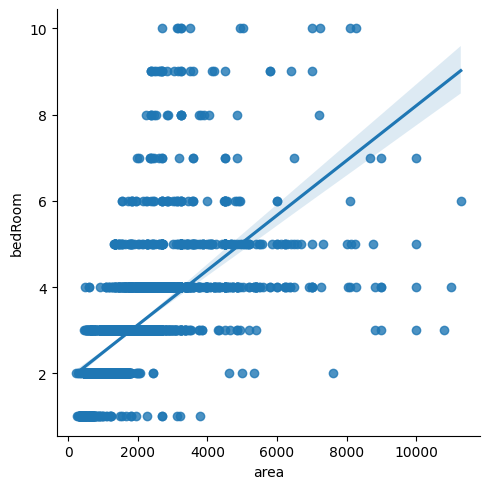

In [258]:
sns.lmplot(data=df,x='area',y='bedRoom')

Missing Value Imputation

In [259]:
pd.set_option('display.max_columns',None)

In [260]:
df.sample(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
953,flat,bestech park view spa next,sector 67,2.35,12144.0,1935.0,Super Built up area 1935(179.77 sq.m.),3,4,3+,14.0,South-West,Moderately Old,1935.0,NaN,NaN,0,1,0,0,0,1,156,645.000000
621,flat,sbr minda sec-1 imt manesar,manesar,0.64,4193.0,1526.0,Carpet area: 1526 (141.77 sq.m.),3,2,3+,6.0,East,Old Property,NaN,NaN,1526.0,0,0,0,0,0,0,51,508.666667


In [261]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1968
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

**Built-up-area**

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

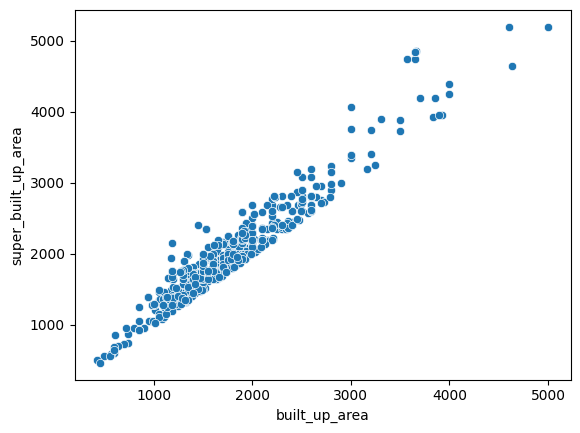

In [262]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

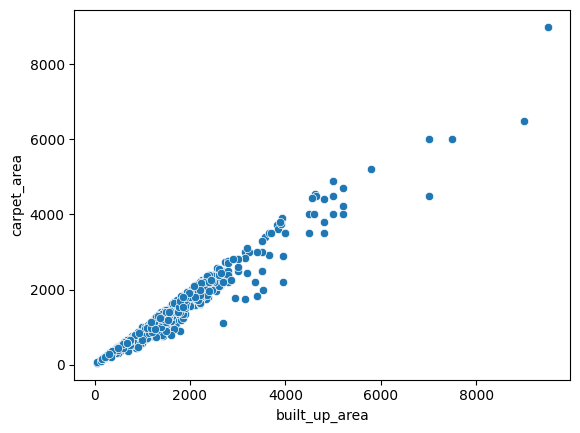

In [263]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['carpet_area'])

In [264]:
df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())].shape[0]

0

There was no record where we have all three area nan

In [265]:
all_area_present = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]  #Getting all the records where we have all 3 areas .

In [266]:
all_area_present.shape

(531, 24)

In [267]:
all_area_present.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2515,flat,vatika lifestyle homes,sector 83,1.05,7500.0,1400.0,Super Built up area 1755(163.04 sq.m.)Built Up...,3,2,2,1.0,South-West,Moderately Old,1755.0,1600.0,1400.0,0,0,0,0,0,1,106,466.666667
2592,flat,gls arawali homes,sohna road,0.35,7000.0,500.0,Super Built up area 567(52.68 sq.m.)Built Up a...,2,2,2,5.0,NaN,Relatively New,567.0,556.0,500.0,0,0,0,0,0,0,30,250.000000
2021,flat,dlf regency park,sector 28,1.24,12400.0,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up...,2,2,3+,19.0,South,Moderately Old,1150.0,1050.0,1000.0,0,0,0,1,0,1,157,500.000000
722,flat,emaar mgf palm terraces select,sector 66,3.40,14107.0,2410.0,Super Built up area 2410(223.9 sq.m.)Built Up ...,4,4,3+,2.0,North-East,Relatively New,2410.0,2210.0,2040.0,0,1,0,0,0,1,157,602.500000
3263,flat,tata primanti,sector 72,3.20,12190.0,2625.0,Super Built up area 2625(243.87 sq.m.)Built Up...,4,4,3+,8.0,North,Moderately Old,2625.0,2600.0,2550.0,0,1,0,0,0,1,168,656.250000


In [268]:
super_to_built_ratio = (df['super_built_up_area']/df['built_up_area']).median()

In [269]:
carpet_to_built_ratio = (df['carpet_area']/df['built_up_area']).median()

In [270]:
print('super_to_built_ratio {} , carpet_to_built_ratio {}'.format(super_to_built_ratio,carpet_to_built_ratio))

super_to_built_ratio 1.111864406779661 , carpet_to_built_ratio 0.8888888888888888


In [271]:
# Getting records where we dont have built up  area but we have other 2 areas
null_built = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (~(df['carpet_area'].isnull()))]

In [272]:
null_built.sample(3)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
2899,flat,birla navya,sector 63a,3.30,15348.0,2150.0,Super Built up area 2150(199.74 sq.m.)Carpet a...,3,3,3,4.0,West,Under Construction,2150.0,NaN,1200.0,0,1,0,0,0,0,52,716.666667
1754,flat,godrej aria,sector 79,0.96,13296.0,722.0,Super Built up area 1351(125.51 sq.m.)Carpet a...,2,2,3,8.0,North-East,Relatively New,1351.0,NaN,722.0,0,0,0,0,0,0,49,361.000000
3500,flat,puri emerald bay,sector 104,2.23,9911.0,2250.0,Super Built up area 2450(227.61 sq.m.)Carpet a...,3,4,3+,10.0,East,Relatively New,2450.0,NaN,2250.0,0,1,0,0,0,1,159,750.000000


In [273]:
null_built['built_up_area'].fillna(round(((null_built['super_built_up_area']/1.11) + (null_built['carpet_area']/0.88))/2),inplace=True)

<ipython-input-273-f38d84199727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_built['built_up_area'].fillna(round(((null_built['super_built_up_area']/1.11) + (null_built['carpet_area']/0.88))/2),inplace=True)


In [274]:
df.update(null_built)

In [275]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1547
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [276]:
null_bulitcarpet = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [277]:
null_bulitcarpet.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
837,flat,tulip purple,sector 69,2.60,10833.0,2400.0,Super Built up area 2400(222.97 sq.m.),4,4,3+,4.0,NaN,Moderately Old,2400.0,NaN,NaN,0,1,0,0,0,0,37,600.0
2662,flat,tulip violet,sector 69,1.68,8358.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,2.0,North-West,Relatively New,2010.0,NaN,NaN,0,0,0,1,0,0,112,502.5
369,flat,dlf the ultima,sector 81,2.20,10476.0,2100.0,Super Built up area 2100(195.1 sq.m.),3,4,3+,17.0,East,Relatively New,2100.0,NaN,NaN,0,1,0,0,0,2,49,700.0
439,flat,ss the leaf,sector 85,2.30,8179.0,2812.0,Super Built up area 2812(261.24 sq.m.),4,4,3+,8.0,South,Relatively New,2812.0,NaN,NaN,0,1,0,0,0,0,21,703.0
2810,flat,vatika city homes,sector 83,1.00,5747.0,1740.0,Super Built up area 1740(161.65 sq.m.),3,3,2,2.0,South-East,Relatively New,1740.0,NaN,NaN,0,0,1,0,0,1,174,580.0


In [278]:
null_bulitcarpet['built_up_area'].fillna(round(null_bulitcarpet['super_built_up_area']/1.11),inplace=True)

<ipython-input-278-17c2f420fd5c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_bulitcarpet['built_up_area'].fillna(round(null_bulitcarpet['super_built_up_area']/1.11),inplace=True)


In [279]:
df.update(null_bulitcarpet)

In [280]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           672
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [281]:
null_builtsuper = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (~(df['carpet_area'].isnull()))]

In [282]:
null_builtsuper.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
3041,flat,eldeco accolade,sohna road,0.72,5735.0,1255.0,Carpet area: 1264 (117.43 sq.m.),2,2,3,8.0,West,Relatively New,NaN,NaN,1264.0,0,0,0,0,0,0,153,627.500000
525,flat,godrej habitat,sector 3,1.30,9002.0,1444.0,Carpet area: 1444 (134.15 sq.m.),2,2,2,6.0,NaN,Under Construction,NaN,NaN,1444.0,0,0,0,0,0,0,36,722.000000
1094,flat,smart world orchard,sector 61,2.54,15500.0,1639.0,Carpet area: 1640 (152.36 sq.m.),3,3,3,2.0,NaN,Under Construction,NaN,NaN,1640.0,0,0,1,0,0,0,16,546.333333
2481,flat,dlf the ultima,sector 81,2.70,12802.0,2109.0,Carpet area: 2109 (195.93 sq.m.),3,3,3,15.0,North,Relatively New,NaN,NaN,2109.0,0,1,0,0,0,1,49,703.000000
2476,flat,godrej summit,sector 104,1.20,8298.0,1446.0,Carpet area: 1446 (134.34 sq.m.),3,2,3+,16.0,NaN,Relatively New,NaN,NaN,1446.0,1,0,0,1,0,1,142,482.000000


In [283]:
null_builtsuper['built_up_area'].fillna(round(null_builtsuper['carpet_area']/0.88),inplace=True)

<ipython-input-283-041ece75f146>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_builtsuper['built_up_area'].fillna(round(null_builtsuper['carpet_area']/0.88),inplace=True)


In [284]:
df.update(null_builtsuper)

In [285]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area             0
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

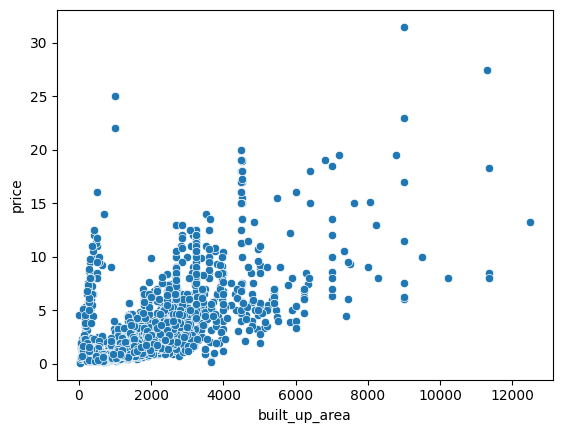

In [286]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['price'])

In [287]:
anaolmy_df = df[(df['built_up_area']<2000)&(df['price']>2.5)][['price','area','built_up_area']]

In [288]:
anaolmy_df.sample(5)

,price,area,built_up_area
806,6.46,3420.0,380.0
1701,4.00,2164.0,1950.0
548,3.50,1440.0,1440.0
36,8.25,2160.0,300.0
2899,3.30,2150.0,1650.0


In [289]:
anaolmy_df['built_up_area'] = anaolmy_df['area']

In [290]:
df.update(anaolmy_df)

<Axes: xlabel='built_up_area', ylabel='price'>

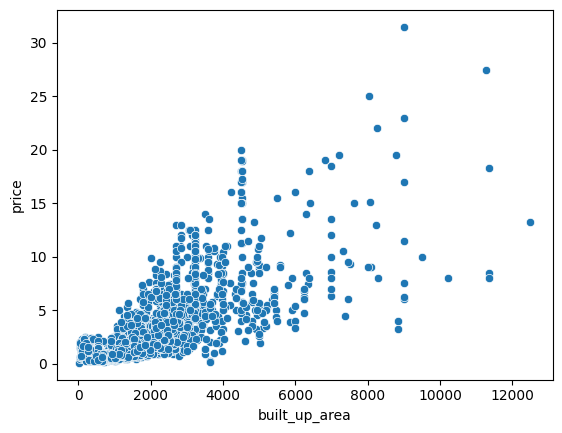

In [291]:
sns.scatterplot(data=df,x=df['built_up_area'],y=df['price'])

In [292]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score', 'area_room_ratio'],
      dtype='object')

In [293]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [294]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [295]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
380,flat,the roselia 2,sector 95,0.45,6475.0,2,2,2,19.0,North,Undefined,695.0,0,0,0,0,0,0,0
2533,house,independent,sector 25,7.30,1560.0,9,9,2,3.0,North-West,Relatively New,5800.0,0,1,1,0,0,1,109
2501,house,independent,sector 17,1.52,19869.0,2,2,1,1.0,South-East,Old Property,105.0,0,0,0,0,0,0,22
2483,house,signature global city 92,sector 92,0.75,7820.0,2,2,3,1.0,NaN,Undefined,959.0,0,0,0,0,0,0,46
2160,flat,hsiidc sidco aravali,manesar,0.91,3516.0,3,3,3+,8.0,East,Moderately Old,1900.0,0,1,0,0,0,0,23


In [296]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

Floor Number

In [297]:
df['floorNum'].isnull().sum()

17

In [298]:
df[(df['property_type']=='house')]['floorNum'].median()

2.0

In [299]:
df['floorNum'].fillna(2.0,inplace=True)

In [300]:
df.isnull().sum()

property_type         0
society               1
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1011
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

**Facing**

In [301]:
df.drop(columns='facing',inplace=True)

In [302]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [303]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [304]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2559,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,0,0


In [305]:
df.drop(index=2559,inplace=True)

In [306]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

**agepossession**

<Axes: ylabel='count'>

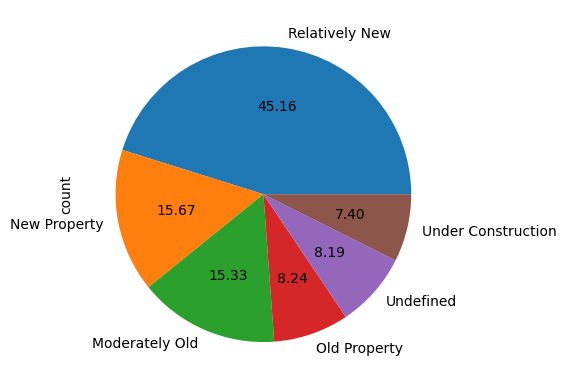

In [307]:
df['agePossession'].value_counts().plot(kind='pie', autopct = '%.2f')

In [308]:
df['agePossession'].value_counts()

agePossession
Relatively New        1605
New Property           557
Moderately Old         545
Old Property           293
Undefined              291
Under Construction     263
Name: count, dtype: int64

In [309]:
df[(df['agePossession']=='Undefined')]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6567.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,0,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,0,0
49,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,0,45
71,flat,rof aalayas,sector 102,0.45,6000.0,1,1,2,6.0,Undefined,750.0,0,0,0,0,0,0,0
75,house,bhim garh kheri,sector 3,1.50,7576.0,7,2,0,1.0,Undefined,1980.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3529,flat,raheja vedaanta,sector 108,0.70,4522.0,2,2,3,1.0,Undefined,1548.0,0,0,0,0,0,0,0
3534,flat,signature global city,sector 37d,1.10,9838.0,2,2,2,4.0,Undefined,1270.0,0,0,0,0,0,0,59
3540,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,608.0,0,0,0,0,0,0,0
3552,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,0,0


In [310]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

In [311]:
def mode_age(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector']==row['sector']) & (df['property_type']==row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [312]:
df['agePossession'] = df.apply(mode_age,axis= 1)

In [313]:
df['agePossession'].value_counts()

agePossession
Relatively New        1715
New Property           598
Moderately Old         585
Old Property           324
Under Construction     277
Undefined               55
Name: count, dtype: int64

In [314]:
def mode_age2(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['sector']==row['sector'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [315]:
df['agePossession'] = df.apply(mode_age2,axis= 1)

In [316]:
df['agePossession'].value_counts()

agePossession
Relatively New        1730
New Property           599
Moderately Old         592
Old Property           327
Under Construction     277
Undefined               29
Name: count, dtype: int64

In [317]:
def mode_age3(row):
  if row['agePossession'] == 'Undefined':
    mode_value = df[(df['property_type']==row['property_type'])]['agePossession'].mode()
    if not mode_value.empty:
      return mode_value.iloc[0]
    else:
      return np.nan
  else:
    return row['agePossession']

In [318]:
df['agePossession'] = df.apply(mode_age3,axis= 1)

In [319]:
df['agePossession'].value_counts()

agePossession
Relatively New        1732
Moderately Old         619
New Property           599
Old Property           327
Under Construction     277
Name: count, dtype: int64

In [320]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64